# Introduction

   There are a plethora of different data types in Python. Some data types are not compatible with others when trying to run a function and often times you will need to convert the type of a variable so that you can interact with it in the way you want. Because there are many different types of data, it is useful to know what packages are the best to use to help you accomplish the task at hand. Time data is particularly interesting to work with because the units are not base 10 like most data you may work with. Hours, minutes, seconds, months, days, and years all have different base units which can make interacting with them in an interpretable way tricky. I ran into this problem as I was working with a data set for a 5K/10K run that is annually held in Provo, UT. One feature we were interested in learning more about was finding out the difference between when the race started and when the individual crossed the starting line. Interacting with the data and putting it into a working format was quite a challenge for me and that inspired me to learn more about datetime objects and timedeltas. Over the course of this tutorial I will show you how to change strings into datetime objects and then show you how you can interact with datetime objects using a semi-cleaned version of the dataset I was given.

# Tutorial

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns

In [98]:
# Read in the semi-cleaned data
temp2 = pd.read_csv('project_data.csv')

In [99]:
temp2.head()

,bib,name,race,division,city,state,chip_time,gun_time,pace,overall_place,gender_place,division_place
0,507,Joshua Frei,5k,M top-fin,Rochester,MN,1900-01-01 00:17:27,1900-01-01 00:17:27,5:37/M,1 of 781,1 of 346,1 of 1
1,781,Wesley Porter,5k,M 20-29,Orem,UT,1900-01-01 00:17:30,1900-01-01 00:17:33,5:39/M,2 of 781,2 of 346,1 of 160
2,441,Jeffrey Coombs,5k,M 20-29,Provo,UT,1900-01-01 00:17:34,1900-01-01 00:17:36,5:40/M,3 of 781,3 of 346,2 of 160
3,442,John Coombs,5k,M 20-29,Rifle,CO,1900-01-01 00:18:07,1900-01-01 00:18:09,5:51/M,4 of 781,4 of 346,3 of 160
4,1074,Brian Grover,5k,M 20-29,Provo,UT,1900-01-01 00:18:09,1900-01-01 00:18:11,5:51/M,5 of 781,5 of 346,4 of 160


The features we're interested in are chip_time and gun_time. Currently they are not in the right format but I have split up the chip_time and gun_time columns into columns based on the correct hour, minute, and second so that we can use pd.to_datetime to create our new datetime object.

In [100]:
temp2.dtypes

bib                int64
name              object
race              object
division          object
city              object
state             object
chip_time         object
gun_time          object
pace              object
overall_place     object
gender_place      object
division_place    object
dtype: object

Now with our data cleaned and chip_time and gun_time are finally datetime objects we can now start interacting with the data in the way we want. Because chip_time and gun_time are in the same format, the next step is to create a new feature which will show the difference between when the gun went off and when the individual crossed the starting line which I will call "diff_time".

In [101]:
# Convert this to time data
temp2['chip_time'] = pd.to_datetime(temp2.chip_time)
temp2['gun_time'] = pd.to_datetime(temp2.gun_time)

In [102]:
# Took me an eternity to realize that diff_time got converted to a time delta, made this difficult
temp2['diff_time'] = temp2['gun_time'] - temp2['chip_time']

One thing you may have noticed is the arbitrary year month and day at the beginning of our times that wasn't there before, we don't want that so lets remove it.

In [103]:
# Get rid of those year month days from the columns
temp2['chip_time'] = temp2['chip_time'].dt.strftime('%H:%M:%S')
temp2['gun_time'] = temp2['gun_time'].dt.strftime('%H:%M:%S')

In [104]:
temp2.head()

,bib,name,race,division,city,state,chip_time,gun_time,pace,overall_place,gender_place,division_place,diff_time
0,507,Joshua Frei,5k,M top-fin,Rochester,MN,00:17:27,00:17:27,5:37/M,1 of 781,1 of 346,1 of 1,00:00:00
1,781,Wesley Porter,5k,M 20-29,Orem,UT,00:17:30,00:17:33,5:39/M,2 of 781,2 of 346,1 of 160,00:00:03
2,441,Jeffrey Coombs,5k,M 20-29,Provo,UT,00:17:34,00:17:36,5:40/M,3 of 781,3 of 346,2 of 160,00:00:02
3,442,John Coombs,5k,M 20-29,Rifle,CO,00:18:07,00:18:09,5:51/M,4 of 781,4 of 346,3 of 160,00:00:02
4,1074,Brian Grover,5k,M 20-29,Provo,UT,00:18:09,00:18:11,5:51/M,5 of 781,5 of 346,4 of 160,00:00:02


We now want to look at our pace variable and our diff_time variable together on a graph, in order to do that we need to clean pace a little bit. One issue is that our diff_time is now a timedelta64 object which will not interact with datetime objects. A timedelta is a difference between two date, time, or datetime instances and is different than a datetime object. In order to be able to plot our diff_time column and our pace column we will need to covert pace into a timedelta.

In [105]:
temp2['pace'] = temp2['pace'].str[0:-2]

In [106]:
temp2.dtypes

bib                         int64
name                       object
race                       object
division                   object
city                       object
state                      object
chip_time                  object
gun_time                   object
pace                       object
overall_place              object
gender_place               object
division_place             object
diff_time         timedelta64[ns]
dtype: object

We need to create an arbitrary zero column to subtract from pace in order to make pace a timedelta.

In [107]:
temp2['zero'] = '00:00'
temp2.head()

,bib,name,race,division,city,state,chip_time,gun_time,pace,overall_place,gender_place,division_place,diff_time,zero
0,507,Joshua Frei,5k,M top-fin,Rochester,MN,00:17:27,00:17:27,5:37,1 of 781,1 of 346,1 of 1,00:00:00,00:00
1,781,Wesley Porter,5k,M 20-29,Orem,UT,00:17:30,00:17:33,5:39,2 of 781,2 of 346,1 of 160,00:00:03,00:00
2,441,Jeffrey Coombs,5k,M 20-29,Provo,UT,00:17:34,00:17:36,5:40,3 of 781,3 of 346,2 of 160,00:00:02,00:00
3,442,John Coombs,5k,M 20-29,Rifle,CO,00:18:07,00:18:09,5:51,4 of 781,4 of 346,3 of 160,00:00:02,00:00
4,1074,Brian Grover,5k,M 20-29,Provo,UT,00:18:09,00:18:11,5:51,5 of 781,5 of 346,4 of 160,00:00:02,00:00


In [108]:
# Format our columns to be datetime objects
temp2['zero'] = pd.to_datetime(temp2['zero'],format='%M:%S')
temp2['pace'] = pd.to_datetime(temp2['pace'],format='%M:%S')

In [109]:
temp2.dtypes

bib                         int64
name                       object
race                       object
division                   object
city                       object
state                      object
chip_time                  object
gun_time                   object
pace               datetime64[ns]
overall_place              object
gender_place               object
division_place             object
diff_time         timedelta64[ns]
zero               datetime64[ns]
dtype: object

In [110]:
# Make pace into a timedelta
temp2['pace'] = temp2['pace'] - temp2['zero']

We cannot plot timedeltas against each other so lets convert our timedeltas into doubles, that way we can make a plot with a line of best fit.

In [111]:
temp2['x'] = temp2['diff_time'] / pd.Timedelta(seconds=1)
temp2['y'] = temp2['pace'] / pd.Timedelta(minutes=1)

Remove a data point before creating the plot, the outlier is too intense and doesn't make the plot helpful

In [114]:
# Lets see some of these extremes
temp2.sort_values(by=['diff_time']).tail(1)

,bib,name,race,division,city,state,chip_time,gun_time,pace,overall_place,gender_place,division_place,diff_time,zero,x,y
903,1745,Matthew Christensen,10k,M 20-29,Eureka,UT,00:40:04,01:00:38,00:06:28,19 of 244,16 of 103,11 of 59,00:20:34,1900-01-01,1234.0,6.466667


In [115]:
temp2 = temp2.sort_values(by=['diff_time']).reset_index()
temp2 = temp2.drop(columns=['index'],index=1024)


,bib,name,race,division,city,state,chip_time,gun_time,pace,overall_place,gender_place,division_place,diff_time,zero,x,y
1019,733,Mitch Murphy,5k,M 20-29,Vineyard,UT,00:38:50,00:41:08,00:12:32,480 of 781,248 of 346,124 of 160,00:02:18,1900-01-01,138.0,12.533333
1020,734,Ashley Murphy,5k,F 20-29,Vineyard,UT,00:38:50,00:41:08,00:12:32,481 of 781,233 of 435,120 of 179,00:02:18,1900-01-01,138.0,12.533333
1021,504,Victor Fong,5k,M 30-39,Lehi,UT,00:55:39,00:58:04,00:17:57,716 of 781,327 of 346,44 of 46,00:02:25,1900-01-01,145.0,17.950000
1022,704,Kellie McMillan,5k,F 30-39,Lehi,UT,00:36:06,00:38:40,00:11:39,419 of 781,189 of 435,30 of 79,00:02:34,1900-01-01,154.0,11.650000
1023,703,David McMillan,5k,M 30-39,Lehi,UT,00:40:57,00:44:25,00:13:13,533 of 781,270 of 346,35 of 46,00:03:28,1900-01-01,208.0,13.216667


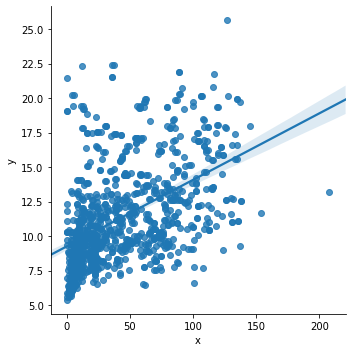

In [116]:
sns.lmplot('x','y',data=temp2)

We have our final product! At long last we are able to plot our results against each other.

# Conclusion

Interacting with time data can be rather difficult but the results are worth it. Formatting the data correctly is essential in order to get the correct results. Datetime objects cannot interact with timedeltas correctly so an arbitrary addition or subtraction needs to occur to convert a datetime to a timedelta. Timedeltas can then be converted to integers or doubles so that you can perform an analysis on the data.